# Triple/Three Moving Averages trading strategy
* Buy when the Middle EMA (Exponential Moving Average) crosses to above the Slow EMA from below and Fast EMA is above Middle EMA and sell when the Fast EMA crosses to below the Middle EMA from above.
* Sell when the Middle EMA crosses to below the Slow EMA from above and when the Fast EMA is below the Middle EMA and buy when the Fast EMA crosses to above middle EMA from below.     
*Source:https://www.incrediblecharts.com/indicators/moving_averages_three.php* <br>

* Buy when the Fast EMA goes above the Slow EMA from below - clear sign of an upward trend.   
* Sell when the Fast EMA goes below the Middle EMA from above - get out sooner rather than later because if there is a steep drop the Slow EMA might not pick it up in time. <br>
*Source:https://www.youtube.com/watch?v=gaGFkxyRW-M&ab_channel=DavidMoadel*

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [33]:
# Read the file in from device
df = pd.read_csv('BTC_INR.csv')

In [34]:
# Change the index to the date
df = df.set_index(pd.DatetimeIndex(df['Date'].values)) 

In [35]:
df.index.name = 'Date'
df.drop(columns=['Date'], inplace=True)

In [36]:
# Check the first few rows
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-10-24,531125.5625,534905.8750,528807.6250,532109.6250,532109.6250,1.155234e+12
2019-10-25,531911.8125,615708.6875,529882.0625,613524.0625,613524.0625,2.033467e+12
2019-10-26,614011.1875,709940.3750,613660.1875,654913.8125,654913.8125,3.152115e+12
2019-10-27,654682.5000,690656.6250,645532.4375,676643.4375,676643.4375,2.308897e+12
2019-10-28,677591.8125,693664.0625,654827.1250,654827.1250,654827.1250,2.189437e+12


In [37]:
# Check of null values in the data
filt = df['Open'].isnull()

In [38]:
# There is 1 day of missing values. Using linear interpolate to fill that value
df = df.interpolate()

## Visualise the data

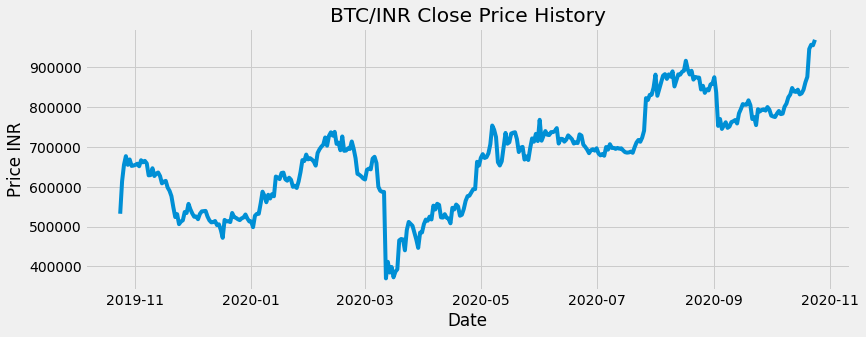

In [39]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label='Close')
plt.title('BTC/INR Close Price History')
plt.xlabel('Date')
plt.ylabel('Price INR')
plt.show()

### Calculate the three moving averages

In [40]:
# Calculate the Fast EMA
FastEMA = df.Close.ewm(span=5, adjust=False).mean()
# Calculate the Middle EMA
MiddleEMA = df.Close.ewm(span=21, adjust=False).mean()
# Calculate the Slow EMA
SlowEMA = df.Close.ewm(span=63, adjust=False).mean()

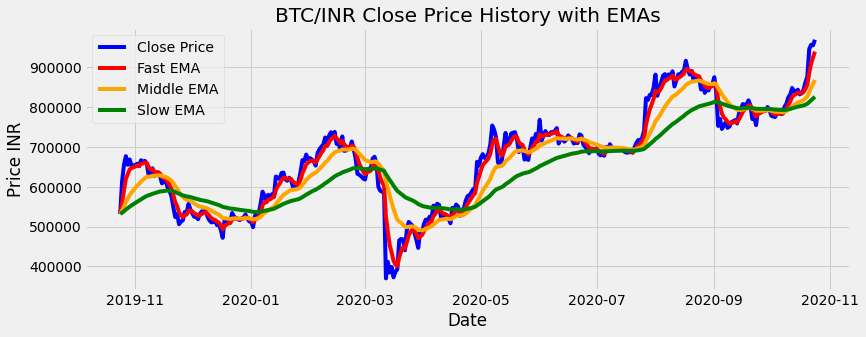

In [41]:
# Visualise the closing price and EMAs
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(FastEMA, label='Fast EMA', color = 'red')
plt.plot(MiddleEMA, label = 'Middle EMA', color='orange')
plt.plot(SlowEMA, label='Slow EMA', color='green')
plt.title('BTC/INR Close Price History with EMAs')
plt.xlabel('Date')
plt.ylabel('Price INR')
plt.legend(loc='upper left')
plt.show()

In [42]:
# Add the exponential moving averages to the dataset
df['Fast'] = FastEMA
df['Middle'] = MiddleEMA
df['Slow'] = SlowEMA

In [43]:
df

,Open,High,Low,Close,Adj Close,Volume,Fast,Middle,Slow
Date,,,,,,,,,
2019-10-24,531125.5625,534905.8750,528807.6250,532109.6250,532109.6250,1.155234e+12,532109.625000,532109.625000,532109.625000
2019-10-25,531911.8125,615708.6875,529882.0625,613524.0625,613524.0625,2.033467e+12,559247.770833,539510.937500,534653.826172
2019-10-26,614011.1875,709940.3750,613660.1875,654913.8125,654913.8125,3.152115e+12,591136.451389,550002.107955,538411.950745
2019-10-27,654682.5000,690656.6250,645532.4375,676643.4375,676643.4375,2.308897e+12,619638.780093,561514.956095,542731.684706
2019-10-28,677591.8125,693664.0625,654827.1250,654827.1250,654827.1250,2.189437e+12,631368.228395,569997.880541,546234.667215
...,...,...,...,...,...,...,...,...,...
2020-10-20,862122.8750,881448.0000,856953.3750,875624.8125,875624.8125,2.271727e+12,855577.909105,826293.385480,807948.166800
2020-10-21,875385.4375,971858.1250,874730.8750,945436.7500,945436.7500,3.200784e+12,885530.856070,837124.600437,812244.685025
2020-10-22,943810.8125,969913.3750,937535.9375,955938.8750,955938.8750,2.560528e+12,909000.195713,847925.898124,816735.128462


In [48]:
# Function to buy and sell the assest

def buy_sell_function(data):
    buy_list = []
    sell_list = []
    flag_long = False # Which portion of strategy are you in i.e. if there is a buy signal - sell it before going to another buy signal
    flag_short = False

    for i in range(len(data)):
        # Buy when the Middle EMA crosses the Slow EMA & the Fast EMA crosses below the Middle EMA
        if data['Middle'][i] < data['Slow'][i] and data['Fast'][i] < data['Middle'][i] and flag_long == False and flag_short == False:
            buy_list.append(data['Close'][i])
            sell_list.append(np.nan)
            flag_short = True
         # Sell when the Fast EMA crosses the Middle EMA
        elif flag_short == True and data['Fast'][i] > data['Middle'][i]:
             sell_list.append(data['Close'][i])
             buy_list.append(np.nan)
             flag_short = False
        
        # Buy when the Slow EMA crosses the Middle EMA & the Fast EMA crosses above the Middle EMA
        elif data['Middle'][i] > data['Slow'][i] and data['Fast'][i] > data['Middle'][i] and flag_long == False and flag_short == False:
            buy_list.append(data['Close'][i])
            sell_list.append(np.nan)
            flag_long = True
         # Sell when the Middle EMA crosses the Fast EMA
        elif flag_long == True and data['Fast'][i] < data['Middle'][i]:
             sell_list.append(data['Close'][i])
             buy_list.append(np.nan)
             flag_long = False

        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
    
    return (buy_list, sell_list)

In [49]:
# Add the buy and sell signals to the dataset

df['Buy'] = buy_sell_function(df)[0]
df['Sell'] = buy_sell_function(df)[1]

In [50]:
df

,Open,High,Low,Close,Adj Close,Volume,Fast,Middle,Slow,Buy,Sell
Date,,,,,,,,,,,
2019-10-24,531125.5625,534905.8750,528807.6250,532109.6250,532109.6250,1.155234e+12,532109.625000,532109.625000,532109.625000,NaN,NaN
2019-10-25,531911.8125,615708.6875,529882.0625,613524.0625,613524.0625,2.033467e+12,559247.770833,539510.937500,534653.826172,613524.0625,NaN
2019-10-26,614011.1875,709940.3750,613660.1875,654913.8125,654913.8125,3.152115e+12,591136.451389,550002.107955,538411.950745,NaN,NaN
2019-10-27,654682.5000,690656.6250,645532.4375,676643.4375,676643.4375,2.308897e+12,619638.780093,561514.956095,542731.684706,NaN,NaN
2019-10-28,677591.8125,693664.0625,654827.1250,654827.1250,654827.1250,2.189437e+12,631368.228395,569997.880541,546234.667215,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-10-20,862122.8750,881448.0000,856953.3750,875624.8125,875624.8125,2.271727e+12,855577.909105,826293.385480,807948.166800,NaN,NaN
2020-10-21,875385.4375,971858.1250,874730.8750,945436.7500,945436.7500,3.200784e+12,885530.856070,837124.600437,812244.685025,NaN,NaN
2020-10-22,943810.8125,969913.3750,937535.9375,955938.8750,955938.8750,2.560528e+12,909000.195713,847925.898124,816735.128462,NaN,NaN


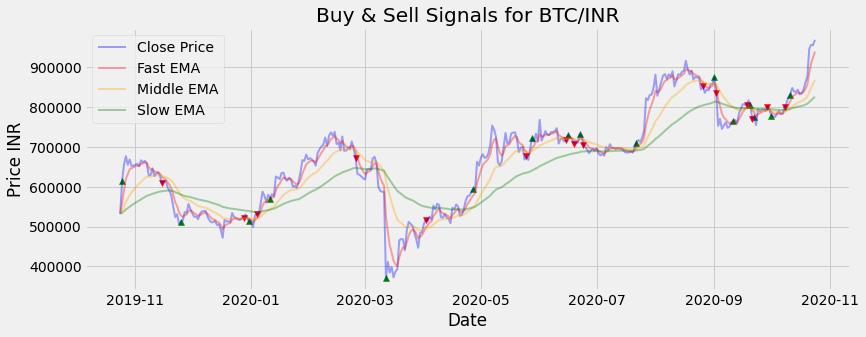

In [66]:
# Visualise the buy & sell signals
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label='Close Price', color='blue', alpha=0.35, linewidth=2)
plt.plot(FastEMA, label='Fast EMA', color = 'red', alpha=0.35, linewidth=2)
plt.plot(MiddleEMA, label = 'Middle EMA', color='orange', alpha=0.35, linewidth=2)
plt.plot(SlowEMA, label='Slow EMA', color='green', alpha=0.35, linewidth=2)
plt.scatter(df.index, df['Buy'], color='green', marker='^', alpha=1)
plt.scatter(df.index, df['Sell'], color='red', marker='v', alpha=1)
plt.title('Buy & Sell Signals for BTC/INR')
plt.xlabel('Date')
plt.ylabel('Price INR')
plt.legend(loc='upper left')
plt.show()


In [53]:
def get_trade_value(buy_price, sell_price, stake):
    ''' Calculates the profit/loss of a sale given 
        the purchase price of an asset (buy_price), 
        the sales price of the asset (sell_price) &
        and the amount invested in the asset'''
    BTC_one_INR = 1/buy_price
    amount_purchased = BTC_one_INR * stake
    sales_value = amount_purchased * sell_price
    return round(sales_value - stake,2)

In [59]:
buy_signal_entries = df[df.Buy.notna()].copy()
buy_price_high = buy_signal_entries['High'].values

In [61]:
sell_signal_entries = df[df.Sell.notna()].copy()
sell_price_low = sell_signal_entries['Low'].values

In [63]:
# Get the buy-sell price pairs in the order the buy buy-sell signals came in 
buy_sell_pairs = [[buy_price_high[i], sell_price_low[i]] for i in range(min(len(buy_price_high), (len(sell_price_low))))]

In [64]:
stake_bid = 10000 
sale_values = [get_trade_value(b,s,stake_bid) for b,s in buy_sell_pairs]
sale_values

[-128.26,
 -81.38,
 29.15,
 1465.44,
 -1445.33,
 1139.08,
 -532.0,
 -265.45,
 -399.98,
 1792.69,
 -616.43,
 395.43,
 -645.45,
 128.05,
 -313.14]

In [65]:
print(f'We would have made INR {round(np.sum(sale_values),2):,} by following Three Moving Averages strategy and staking INR {stake_bid:,} each on {len(sale_values)} trades over a period of a year.\nThis would have yielded a ROI of {round(np.sum(sale_values)/(stake_bid* len(sale_values))*100,2)}%.\nThis does not take into account exchange fees')

We would have made INR 522.42 by following Three Moving Averages strategy and staking INR 10,000 each on 15 trades over a period of a year.
This would have yielded a ROI of 0.35%.
This does not take into account exchange fees
